This notebook introduces the problem addressed in this paper:

 - localizating an object in a large image
 - foveation
 - action (saccade)
 

In [1]:
#%run 0_parameters.ipynb

In [2]:
from where import Where
from what import WhatNet
from retina import Retina
import torch.nn.functional as F

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Training the Where network

In [4]:
%ls -lh ../data/*pt

-rw-r--r--  1 laurentperrinet  staff    12M Mar 13 22:14 ../data/2019-03-13_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 14 17:44 ../data/2019-03-14_b_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 14 06:17 ../data/2019-03-14_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 14 14:54 ../data/2019-03-14_train3.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 14 19:28 ../data/2019-03-14_train4.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 15 22:18 ../data/2019-03-15_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 15 15:31 ../data/2019-03-15_train_b.pt
-rw-r--r--  1 laurentperrinet  staff   8.8M Mar 20 17:46 ../data/2019-03-16_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 19 00:19 ../data/2019-03-18_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 19 15:18 ../data/2019-03-19_bis_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 19 15:54 ../data/2019-03-19_train.pt
-rw-r--r--  1 laurentperrinet  staff    12M Mar 27 16:3

In [5]:
from main import init
#args = init(filename='debug')
#args = init(filename='../data/2019-03-19_bis')
args = init(filename='../data/2019-06-13')
#args = init(filename='../data/2019-03-29')

args.save_model = True
period = 10
args.sf_0 = 1/period
args.B_sf = 1/period
args.contrast = 0.7
args.offset_std = 30
'''args.bn1_bn_momentum = 0
args.bn2_bn_momentum = 0
args.p_dropout = 0.5
args.lr = 1e-4
args.dim1 = 1000
args.dim2 = 1000
args.epochs = 60
args.verbose = True
args.save_model = True'''


'args.bn1_bn_momentum = 0\nargs.bn2_bn_momentum = 0\nargs.p_dropout = 0.5\nargs.lr = 1e-4\nargs.dim1 = 1000\nargs.dim2 = 1000\nargs.epochs = 60\nargs.verbose = True\nargs.save_model = True'

In [6]:
nb_saccades = 1
figname = '../paper/fig_result_contrast_{:.1f}_{}'.format(args.contrast, nb_saccades)
figname

'../paper/fig_result_contrast_0.7_1'

In [7]:
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-13',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True}

In [8]:
if False:
    !rm ../data/2019-04-05_train.pt


In [9]:
args.epochs = 60

In [10]:
#args.train_batch_size = 20
#args.test_batch_size = 20
#retina = Retina(args)
where = Where(args) #, generate_data=False) #False, save = False)

#filename_train = args.filename + '_train.pt'
#filename_train = "../data/2019-03-14_train4.pt"
#filename_train = "../data/2019-03-29.pt"
#%ls -lh {filename_train}
#%rm {filename_train}
#%rm  ../data/debug_train.pt

#where.train(filename_train)

/usr/local/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'what.WhatNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patch

Retina vectorizing...
ok
success
Done vectorizing...
Inversing retina transform...
Done Inversing retina transform...
Generating training dataset
0 100
1 200
2 300
3 400
4 500
5 600
6 700
7 800
8 900
9 1000
10 1100
11 1200
12 1300
13 1400
14 1500
15 1600
16 1700
17 1800
18 1900
19 2000
20 2100
21 2200
22 2300
23 2400
24 2500
25 2600
26 2700
27 2800
28 2900
29 3000
30 3100
31 3200
32 3300
33 3400
34 3500
35 3600
36 3700
37 3800
38 3900
39 4000
40 4100
41 4200
42 4300
43 4400
44 4500
45 4600
46 4700
47 4800
48 4900
49 5000
50 5100
51 5200
52 5300
53 5400
54 5500
55 5600
56 5700
57 5800
58 5900
59 6000
60 6100
61 6200
62 6300
63 6400
64 6500
65 6600
66 6700
67 6800
68 6900
69 7000
70 7100
71 7200
72 7300
73 7400
74 7500
75 7600
76 7700
77 7800
78 7900
79 8000
80 8100
81 8200
82 8300
83 8400
84 8500
85 8600
86 8700
87 8800
88 8900
89 9000
90 9100
91 9200
92 9300
93 9400
94 9500
95 9600
96 9700
97 9800
98 9900
99 10000
100 10100
101 10200
102 10300
103 10400
104 10500
105 10600
106 10700
10

In [11]:
where.model

WhereNet(
  (bn1): Linear(in_features=2880, out_features=1000, bias=True)
  (bn1_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (bn2): Linear(in_features=1000, out_features=1000, bias=True)
  (bn2_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (bn3): Linear(in_features=1000, out_features=240, bias=True)
)

In [12]:
retina_data, accuracy_colliculus = next(iter(where.loader_train))

In [13]:
from where import Normalize
retina_data = Normalize()(retina_data.float())


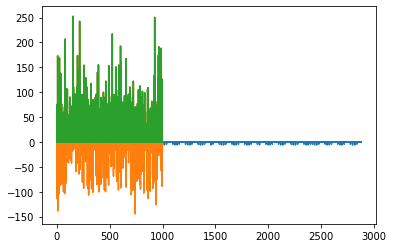

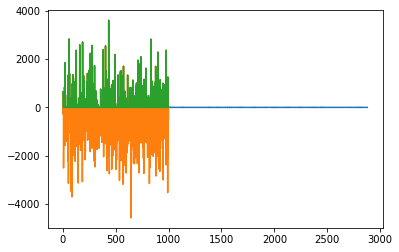

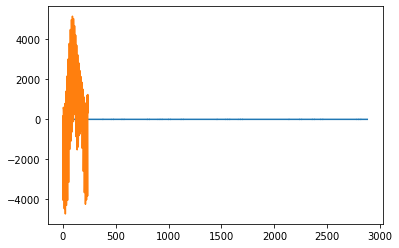

In [14]:
i = 1
data_i = retina_data[i,:].float()
plt.plot(data_i.detach().numpy())
x = where.model.bn1(data_i)
plt.plot(x.detach().numpy())
x = F.relu(x)
plt.plot(x.detach().numpy())
plt.show()
x2 = where.model.bn2(x)
plt.plot(data_i.detach().numpy())
plt.plot(x2.detach().numpy())
x2 = F.relu(x2)
plt.plot(x2.detach().numpy())
plt.show()
x3 = where.model.bn3(x2)
plt.plot(data_i.detach().numpy())
plt.plot(x3.detach().numpy())
#plt.plot(where.model.bn1(retina_data.float())[i,:].detach().numpy())

In [15]:
import torch

output = torch.sigmoid(where.model(retina_data))
output_test = where.pred_accuracy(retina_data)

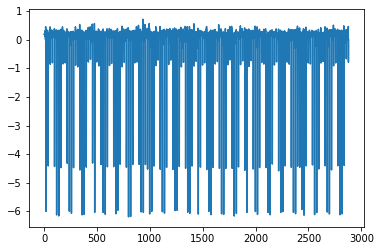

In [16]:
plt.plot(retina_data[i,:].detach().numpy())

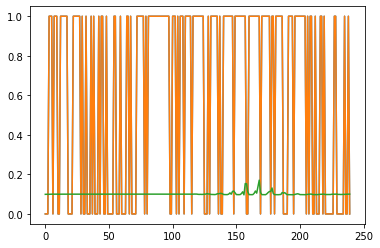

In [17]:
plt.plot(output[i, :].detach().numpy())
plt.plot(output_test[i, :])
plt.plot(accuracy_colliculus[i, :].detach().numpy())

In [18]:
retina_data_test, retina_fullfield_test, accuracy_colliculus_test, accuracy_colliculus_fullfield_test, labels_test, i_shift, j_shift = next(iter(where.loader_test))
#(retina_data_test, retina_fullfield_test), (accuracy_colliculus_test, accuracy_colliculus_fullfield_test, labels_test, i_shift, j_shift) = next(iter(where.loader_test))

In [19]:
from what import WhatTrainer
data, label = next(iter(WhatTrainer(args).test_loader))

AttributeError: 'EasyDict' object has no attribute 'what_offset_std'

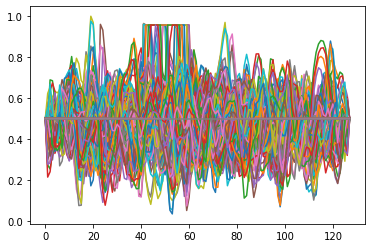

In [20]:
_ = plt.plot(retina_fullfield_test[i,:].detach().numpy())

In [21]:
#plt.plot(data[i,:].detach().numpy())

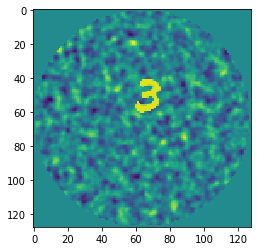

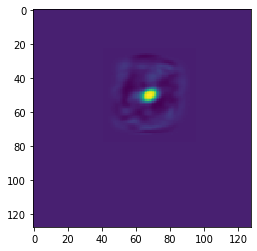

In [22]:
plt.imshow(retina_fullfield_test[i,:])
plt.show()
plt.imshow(accuracy_colliculus_fullfield_test[i,:])


In [23]:
output = torch.sigmoid(where.model(retina_data_test.float()))

Text(0.5, 1.05, 'True')

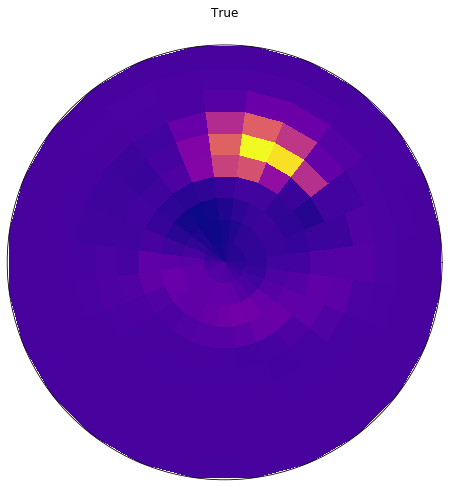

In [24]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus_test[i, :].detach().numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("True")

Text(0.5, 1.05, 'predicted')

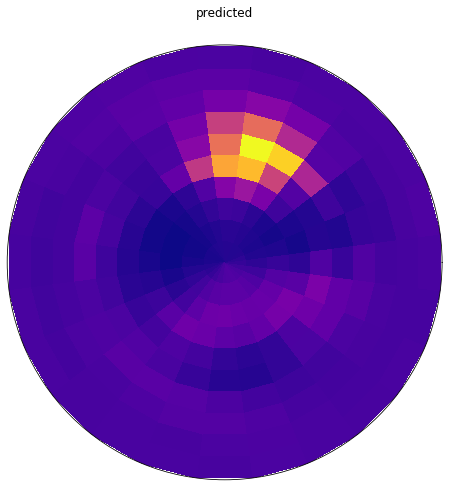

In [25]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, output[i, :].detach().numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("predicted")

# Visualisation of some examples

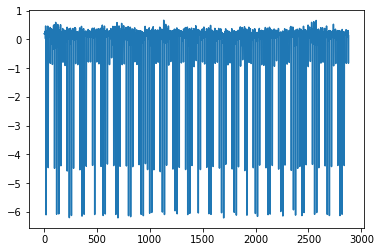

In [26]:
i = 3
plt.plot(retina_data[i,:].detach().numpy())

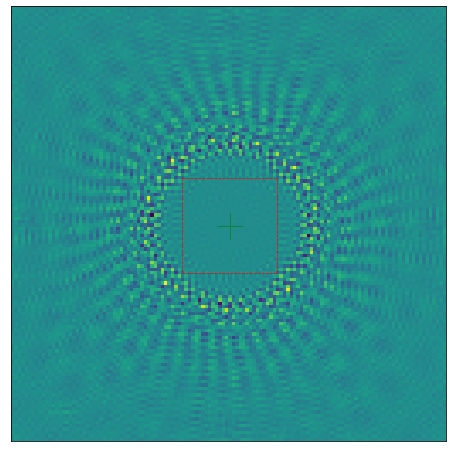

In [27]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax = where.retina.show(ax, where.retina.retina_invert(retina_data[i,:].detach().numpy()))


Text(0.5, 1.05, 'True')

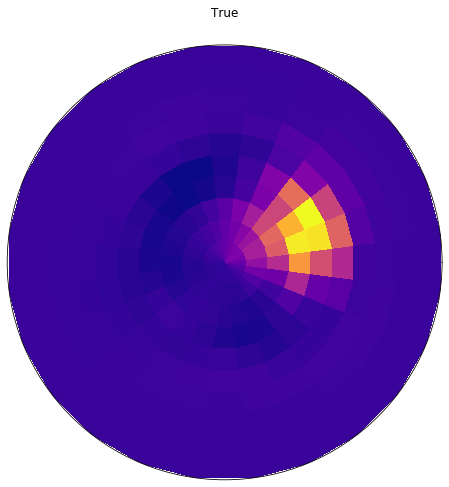

In [28]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[i, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title("True")

In [29]:
retina_data

tensor([[ 0.2013,  0.2089,  0.2144,  ...,  0.3014, -0.7793,  0.0911],
        [ 0.1994,  0.2089,  0.2087,  ...,  0.4675, -0.7852,  0.0041],
        [ 0.1953,  0.1687,  0.1675,  ...,  0.2997, -0.8465,  0.0457],
        ...,
        [ 0.2105,  0.1963,  0.2029,  ...,  0.1267, -0.8342,  0.2059],
        [ 0.1477,  0.2458,  0.2346,  ...,  0.4552, -0.8320,  0.1599],
        [ 0.1806,  0.1560,  0.1764,  ...,  0.0842, -0.7958,  0.2458]])

In [30]:
min(accuracy_colliculus[3,:])

tensor(0.0508)

In [31]:
print(accuracy_colliculus.shape)
print(args.N_azimuth)
print(args.N_eccentricity) 

print(where.args.N_azimuth)
print(where.args.N_eccentricity) 

torch.Size([100, 240])
24
10
24
10


## knowing the target position

In [32]:
idx_start, idx_stop = 0, 20


In [33]:
#positions, data_fullfield, retina_data, accuracy_colliculus = where.minibatch(data[idx_start:idx_stop])
#positions, data_fullfield, retina_data, accuracy_colliculus = where.minibatch(None) #data[idx_start:idx_stop])

In [34]:
retina_data, data_fullfield, accuracy_colliculus, _, label, i_offset, j_offset = next(iter(where.loader_test))

14.834848

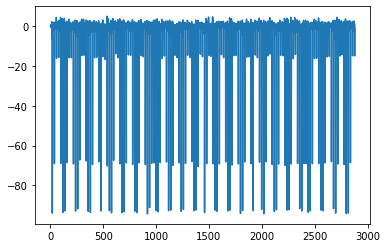

In [35]:
plt.plot(retina_data[i,:].detach().numpy())
np.std(retina_data[i,:].detach().numpy())

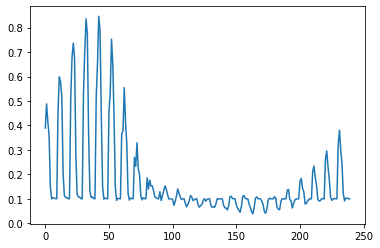

In [36]:
plt.plot(accuracy_colliculus[i,:].detach().numpy())

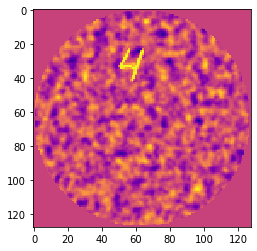

In [37]:
plt.imshow(data_fullfield[2,:])

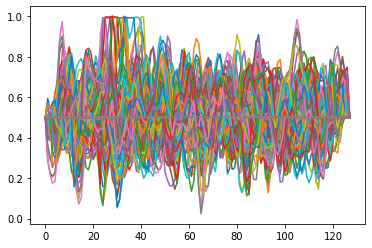

In [38]:
_ = plt.plot(data_fullfield[2,:].detach().numpy())
#data_fullfield *= 255

In [39]:
import numpy as np
Delta=0

#im = np.zeros((args.test_batch_size, args.w, args.w))
im = np.zeros((idx_stop, where.args.w, where.args.w))
for idx in range(idx_stop): #args.test_batch_size):
    #im[idx, :, :] = where.extract(data_fullfield[idx, :, :], positions[idx]['i_offset'], positions[idx]['j_offset'])
    im[idx, :, :] = where.extract(data_fullfield[idx+Delta, :, :], i_offset[idx+Delta], j_offset[idx+Delta])
proba = where.classify_what(im).detach().numpy()
pred = proba.argmax(axis=1)# get the index of the max log-probability
#acc = proba[:, pred]

print(pred)
label_n = label[idx_start+Delta:idx_stop+Delta].detach().numpy()
print(label_n)
print(np.mean(np.equal(pred, label_n)))

#.detach().numpy().mean() #(pred==label.numpy()).mean()
#print('Accuracy max (knowing the position)=', acc_max)

AttributeError: 'Conv2d' object has no attribute 'padding_mode'

## Generate a noisy MNIST database

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import os

#im = np.zeros((args.test_batch_size, args.w, args.w))

from display import get_data_loader
filename_dataset = '../data/noisy-MNIST.pt'

if not os.path.isfile(filename_dataset):
    batch_size = 100
    loader_full = get_data_loader(batch_size=batch_size, train=True, mean=where.args.mean, std=where.args.std, seed=where.args.seed+1)
    im = np.zeros((where.args.train_batch_size, 1, where.args.w, where.args.w))
    im_label = np.zeros(where.args.train_batch_size, dtype = 'int')
    for idx, (data, label) in enumerate (loader_full):
        if idx % 10 == 0:
            print(idx * 100)
        if idx == 500:
            break
        for j in range(batch_size):
            data_fullfield_, i_offset, j_offset = where.display.draw(data[j, 0, :, :].numpy())
            extracted = where.extract(data_fullfield_, i_offset, j_offset)
            im[idx * batch_size + j, 0, :, :] = extracted.reshape(1, 28, 28)
            im_label[idx * batch_size + j] = label[j]
    im = Variable(torch.FloatTensor(im)).to(where.device)
    im_label = Variable(torch.LongTensor(im_label)).to(where.device)
    loader_train = DataLoader(TensorDataset(im, im_label), batch_size=100)
    torch.save(loader_train, filename_dataset)
#.detach().numpy().mean() #(pred==label.numpy()).mean()
#print('Accuracy max (knowing the position)=', acc_max)

In [ ]:
if False:
    check_loader = torch.load(filename_dataset)
    im, label = next(iter(check_loader))
    im.shape
    i = 4
    plt.imshow(im[i,0,:,:])
    plt.title(label[i].detach().numpy())

In [ ]:
idx = 1
plt.imshow(data_fullfield[idx,:,:])
print(i_offset[idx], j_offset[idx], label[idx])
plt.show()
#f = plt.plot(Normalize()(data_fullfield[idx,:,:]).detach().numpy())
f = plt.plot(data_fullfield[idx,:,:].detach().numpy())

In [ ]:
idx_start, idx_stop = 0, 20

#from main_orig import init
#args = init()
#args.N_azimuth * args.N_eccentricity

In [1]:
z=0

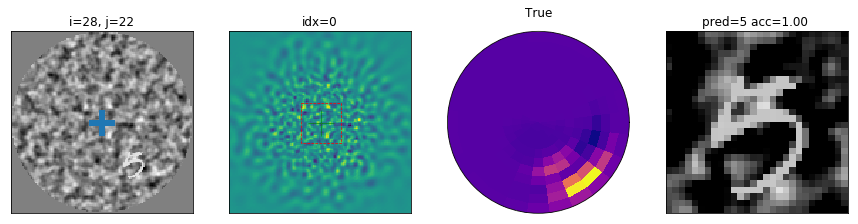

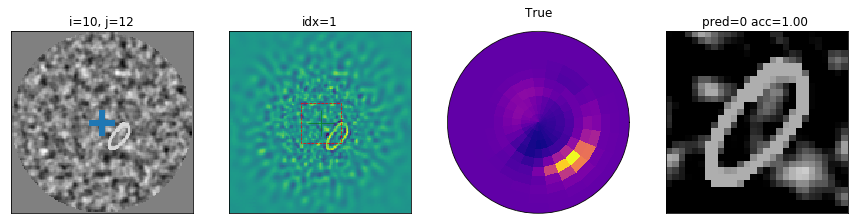

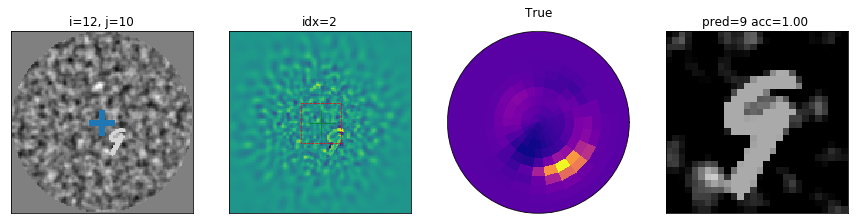

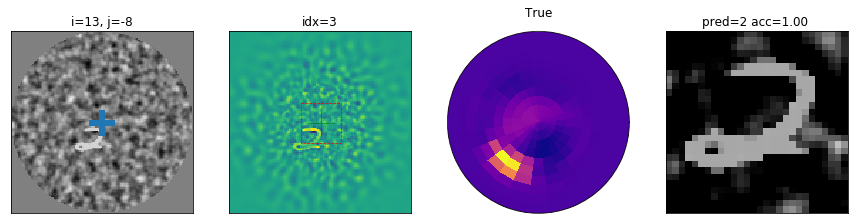

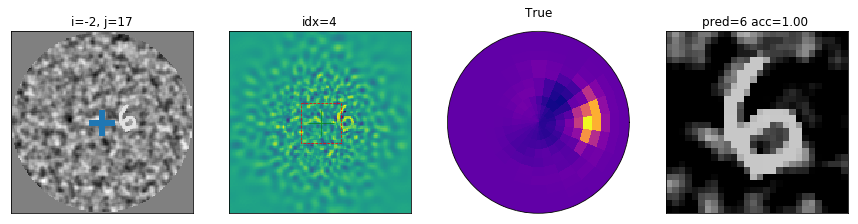

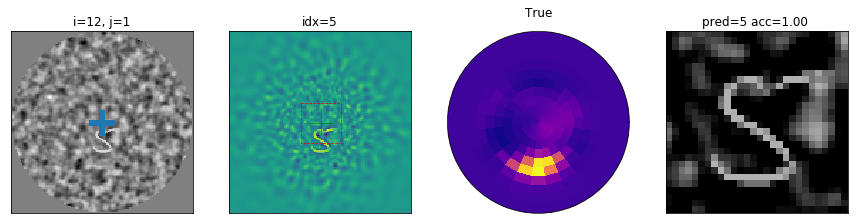

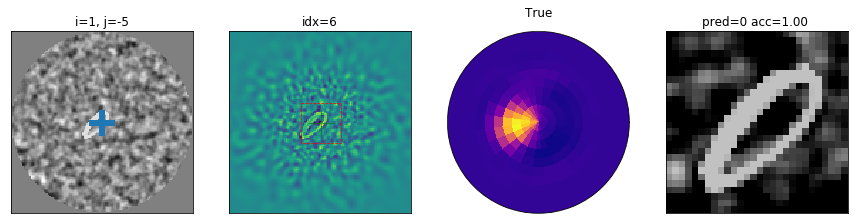

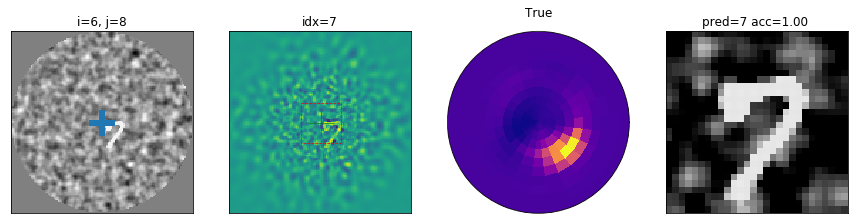

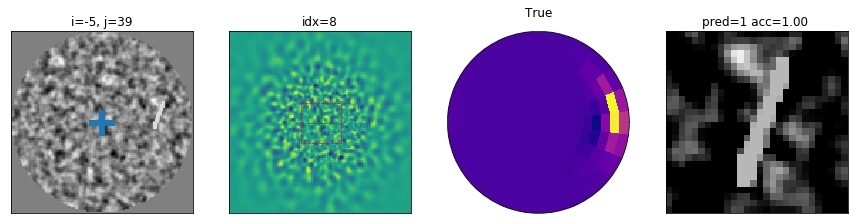

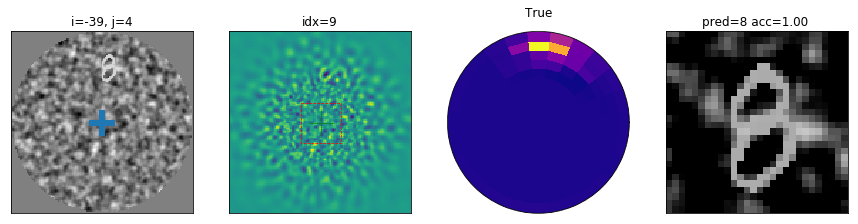

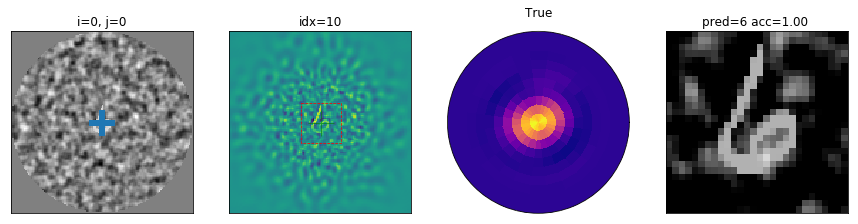

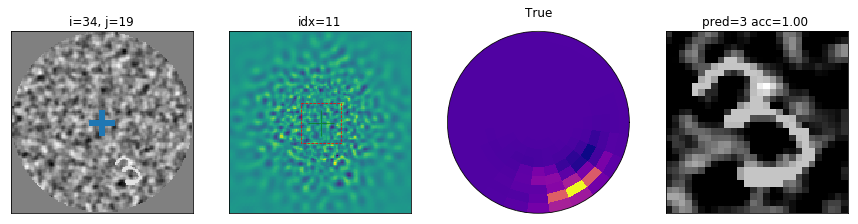

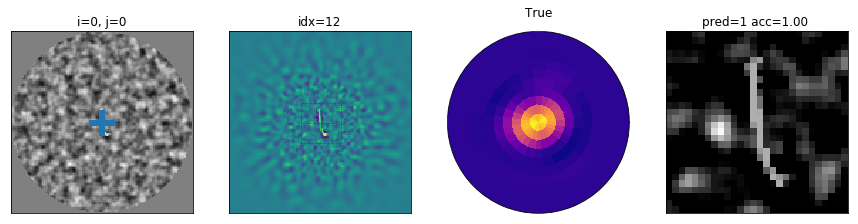

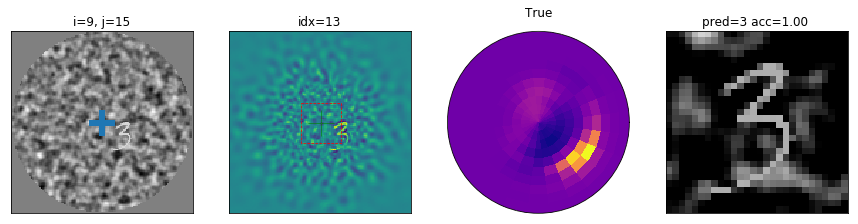

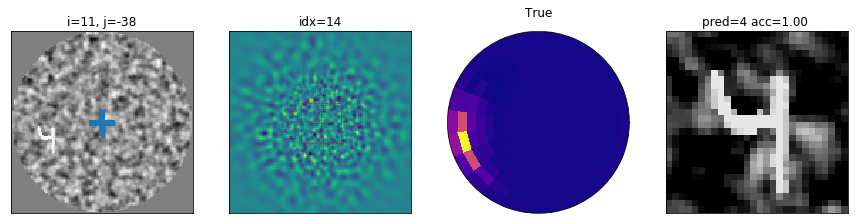

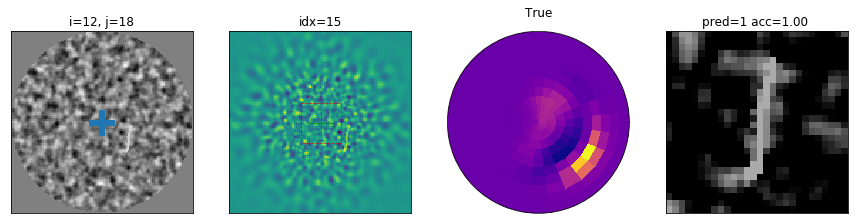

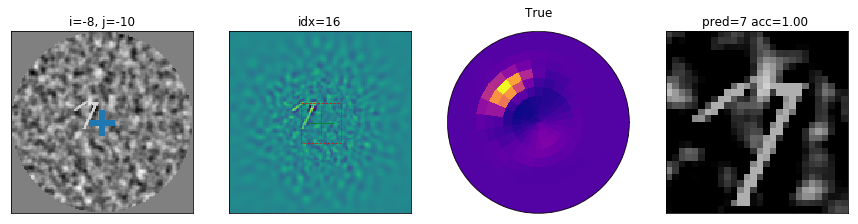

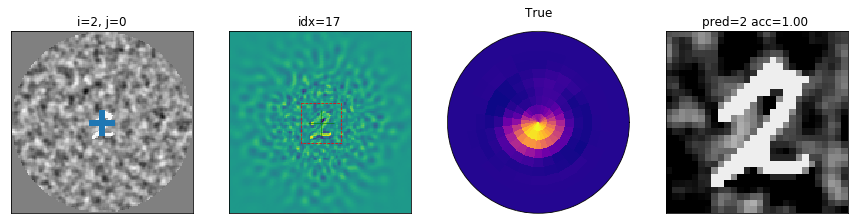

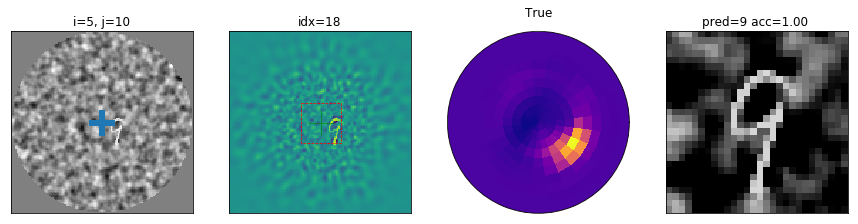

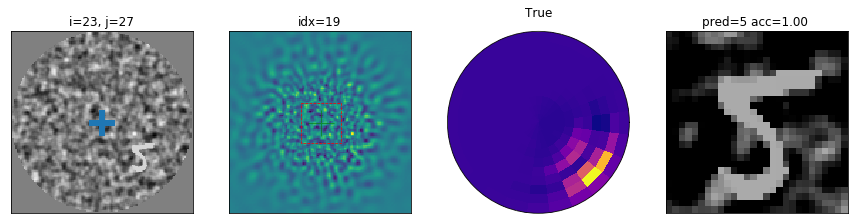

In [45]:
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))
    
    ax = fig.add_subplot(141)
    ax = where.display.show(ax, data_fullfield[idx, :, :])
    #ax.set_title(f"i={positions[idx]['i_offset']}, j={positions[idx]['j_offset']}")
    ax.set_title(f"i={i_offset[idx]}, j={j_offset[idx]}")
    
    ax = fig.add_subplot(142)
    data_retina = where.retina.retina(data_fullfield[idx, :, :])
    ax = where.retina.show(ax, where.retina.retina_invert(data_retina))
    ax.set_title(f"idx={idx}")
              
    ax = fig.add_subplot(143, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("True")

    ax = fig.add_subplot(144)
    ax = where.display.show(ax, im[idx, :, :], do_cross=False)
    result = '' if pred[idx]==label[idx].numpy() else 'FALSE'
    ax.set_title(f"pred={pred[idx]} acc={proba[idx,pred[idx]]:.2f} {result}")
                 

## predicting the position of the target

In [ ]:
pred_accuracy_colliculus = where.pred_accuracy(retina_data)
print('pred_accuracy_colliculus.shape=', pred_accuracy_colliculus.shape)

In [ ]:
plt.plot(pred_accuracy_colliculus[2,:])

In [ ]:
im_colliculus = where.retina.accuracy_invert(pred_accuracy_colliculus[0,:])
im_colliculus.shape

In [ ]:
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))

    ax = fig.add_subplot(131, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_title("Predicted")
    ax.set_yticklabels([])
    ax.set_xticklabels([])
              
    x = where.retina.accuracy_invert(pred_accuracy_colliculus[idx, :])
    ax = fig.add_subplot(132)
    ax.imshow(x, vmin=0, cmap=plt.plasma())
    ax.set_title("Pred visual space")
    
    i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :], do_shortcut=True)
    
    ax = fig.add_subplot(133)
    ax = where.display.show(ax, data_fullfield[idx, :, :])
    #ax.set_title(f"i={positions[idx]['i_offset']}/{i_pred}, j={positions[idx]['j_offset']}/{j_pred}")
    ax.set_title(f"i={i_offset[idx]}/{i_pred}, j={j_offset[idx]}/{j_pred}")
    #ax.plot([positions[idx]['j_offset']+args.N_pic//2], [positions[idx]['i_offset']+args.N_pic//2], '+', c='r', ms=26, markeredgewidth=2, alpha=.5)
    ax.plot([j_offset[idx]+args.N_pic//2], [i_offset[idx]+args.N_pic//2], '+', c='r', ms=26, markeredgewidth=2, alpha=.5)
    ax.plot([j_pred+args.N_pic//2], [i_pred+args.N_pic//2], '+', c='b', ms=26, markeredgewidth=2, alpha=.5)
    
    

## doing a saccade at the predicted the position of the target

In [ ]:
print(data_fullfield.shape, retina_data.shape, label.shape)

In [ ]:
accuracy = where.test_what(data_fullfield, pred_accuracy_colliculus, label)
#print('mean accuracy =', accuracy.mean())
accuracy

In [ ]:
where.what_class(data_fullfield, pred_accuracy_colliculus)

In [ ]:
from display import minmax
pred_accuracy_colliculus = where.pred_accuracy(retina_data)
pred = where.what_class(data_fullfield, pred_accuracy_colliculus)
for idx in range(idx_start, idx_stop):
    fig = plt.figure(figsize = (15, 8))
    
    ax = fig.add_subplot(151)
    ax = where.display.show(ax, data_fullfield[idx, :, :])
    #ax.set_title(f"i={positions[idx]['i_offset']}, j={positions[idx]['j_offset']}")
    ax.set_title(f"i={i_offset[idx]}, j={j_offset[idx]}")
    
    ax = fig.add_subplot(152)
    data_retina = where.retina.retina(data_fullfield[idx, :, :])
    ax = where.retina.show(ax, where.retina.retina_invert(data_retina))
    ax.set_title(f"idx={idx}")
              
    ax = fig.add_subplot(153, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("True")

    ax = fig.add_subplot(154, projection='polar')
    ax.pcolor(where.retina.theta_grid, where.retina.log_r_grid, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)), cmap=plt.plasma())
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("Predicted")

    #i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :])
    i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :], do_shortcut=True)
    ax = fig.add_subplot(155)                 
    ax = where.display.show(ax, where.extract(data_fullfield[idx, :, :], i_pred, j_pred), do_cross=False)
    result = '' if pred[idx]==label[idx].numpy() else 'FALSE'
    ax.set_title(f"pred={pred[idx]} acc={proba[idx,pred[idx]]:.2f} {result}")
                 

testing on the test set:

# accuracy as a function of eccentricity


In [ ]:
ecc_max=.8
N_eccentricities = args.N_eccentricity - 1
#eccentricities = args.N_pic / 2 * ecc_max * (1/args.rho)**(args.N_eccentricity - np.arange(N_eccentricities))
eccentricities = np.linspace(where.args.offset_max, 0, N_eccentricities, endpoint=False)

In [ ]:
eccentricities

In [ ]:
def test_eccentricities(N_eccentricities=9, ecc_max=.8, do_control=False):
    import torch
    from torchvision import datasets, transforms
    from torch.utils.data import TensorDataset, DataLoader
    from where import RetinaFill, CollFill, WhereShift, RetinaBackground, RetinaMask, FullfieldRetinaWhiten 
    from where import FullfieldRetinaTransform, FullfieldToFloatTensor, Normalize, MNIST
    from where import FullfieldCollTransform

    eccentricities = args.N_pic / 2 * ecc_max * (1/args.rho)**(args.N_eccentricity - np.arange(N_eccentricities))
    #eccentricities = np.linspace(where.args.offset_max, 0, N_eccentricities, endpoint=False)
    batch_size = 1000 #where.args.test_batch_size # data.shape[0]
    #from retina import get_data_loader
    #loader_test = get_data_loader(batch_size=1, train=False, 
    #                              mean=where.args.mean, std=where.args.std, seed=where.args.seed+10)
        
    accuracy_mean, accuracy_std = [], []
    for eccentricity in eccentricities:
        print(eccentricity)
        fullfield_transform = transforms.Compose([
            RetinaFill(N_pic=args.N_pic),
            WhereShift(args, radius = eccentricity),
            RetinaBackground(contrast=args.contrast,
                             noise=args.noise,
                             sf_0=args.sf_0,
                             B_sf=args.B_sf),
            RetinaMask(N_pic=args.N_pic),
            FullfieldRetinaWhiten(N_pic=args.N_pic),
            FullfieldRetinaTransform(where.retina.retina_transform_vector),
            FullfieldToFloatTensor(),
            #Normalize(fullfield=True)
            # transforms.Normalize((args.mean,), (args.std,))
        ])
        fullfield_target_transform=transforms.Compose([
                               CollFill(where.accuracy_map, keep_label = True, N_pic=args.N_pic, baseline=0.1),
                               WhereShift(args, baseline = 0.1, keep_label = True),
                               FullfieldCollTransform(where.retina.colliculus_transform_vector, keep_label = True),
                               FullfieldToFloatTensor(keep_label = True)
                           ])
        dataset = MNIST('../data',
                        train=False,
                        download=True,
                        transform=fullfield_transform,
                        target_transform=fullfield_target_transform,
                        )
        data_loader = DataLoader(dataset,
                                 batch_size=batch_size,
                                 shuffle=True)

        '''retina_data = np.zeros((batch_size, where.retina.vsize))
        labels = np.zeros((batch_size))
        data_fullfield = np.zeros((batch_size, where.args.N_pic, where.args.N_pic))        
        accuracy_colliculus = np.zeros((batch_size, where.args.N_azimuth * where.args.N_eccentricity))

        for i in range(batch_size):
            data, label = next(iter(loader_test))
            data_fullfield[i, :, :], i_offset, j_offset = where.display.draw(data[0, 0, :, :].numpy(), 
                                                                   radius=eccentricity)
            positions.append(dict(i_offset=i_offset, j_offset=j_offset))
            retina_data[i, :]  =  where.retina.retina(data_fullfield[i, :, :])
            labels[i] = label
        labels =  Variable(torch.FloatTensor(labels))
        retina_data =  Variable(torch.FloatTensor(retina_data))
        pred_accuracy_colliculus = where.pred_accuracy(retina_data)'''
        
        if nb_saccades >1 and not do_control:
            print('ok')
            accuracy = where.multi_test(nb_saccades, dataloader=data_loader)
            accuracy_mean.append(accuracy)
        else:
            data, acc = next(iter(data_loader))
            retina_data = data[0]
            data_fullfield = data[1]
            labels = acc[2]
            pred_accuracy_colliculus = where.pred_accuracy(retina_data)
            accuracy_ = where.test_what(data_fullfield, pred_accuracy_colliculus, labels.squeeze(), do_control=do_control)
            accuracy_mean.append(accuracy_.mean())
            accuracy_std.append(accuracy_.std()) # TODO fit with beta distribution'''
        
        
    return eccentricities, np.array(accuracy_mean), np.array(accuracy_std)

In [ ]:
from where import where_suffix
import os
suffix = where_suffix(args)
file_path = '/tmp/eccentricity_accuracy_{}_{}.npy'.format(suffix, nb_saccades)
if True:
    eccentricities, accuracy_mean, accuracy_std = test_eccentricities(N_eccentricities)
    print('eccentricities=', eccentricities, ', accuracy_data=', accuracy_mean, ' +/- ', accuracy_std)
    eccentricities, ctl_accuracy_mean, ctl_accuracy_std = test_eccentricities(N_eccentricities, do_control=True)
    print('eccentricities=', eccentricities, ', ctl_accuracy_data=', ctl_accuracy_mean, ' +/- ', ctl_accuracy_std)
    np.save(file_path,[eccentricities, accuracy_mean, ctl_accuracy_mean])
else:
    data = np.load(file_path)
    eccentricities = data[0]
    accuracy_mean = data[1]
    ctl_accuracy_mean = data[2]

In [ ]:
accuracy_mean

In [ ]:
figwidth = 15
fig = plt.figure(figsize = (figwidth, figwidth/1.618))
ax_D = fig.add_subplot(1, 1, 1)
width = .8*np.abs(np.gradient(eccentricities)[0])
ax_D.bar(eccentricities, accuracy_mean, width=width, alpha = .7, label = 'One saccade')#yerr=accuracy_std, 
# TODO what instead? ax_D.bar(eccentricities, accuracy_data, alpha = .5, label = 'No saccade') #accuracy_map[27,27:55])
ax_D.bar(eccentricities, ctl_accuracy_mean, width=width, color='orange', alpha = .7, label = 'No saccade')
ax_D.plot([eccentricities.min()-width/2, eccentricities.max()+width/2], [0.1]*2, ':', c='k', label = 'Baseline')
plt.legend(loc='best')
#ax_D.set_title('Class accuracy', fontsize = 14)
ax_D.set_xlabel('Target eccentricity (pixels)', fontsize = 12)
ax_D.set_xticks(eccentricities)
ax_D.set_xticklabels(['%.1f' % d for  d in eccentricities])
ax_D.set_ylim([0,1]);

# summary


In [ ]:
from where import WhereShift
idx = 13
fullfield = data_fullfield[idx, :, :]

fig = plt.figure(figsize = (figwidth, figwidth/2.5))#1.618))
ax_A = plt.subplot(1, 4, 1) 
data_retina = where.retina.retina(fullfield)
ax_A = where.retina.show(ax_A, where.retina.retina_invert(data_retina))
    
ax_B = plt.subplot(2, 4, 2, projection='polar', autoscale_on=False)
ax_B.pcolor(where.retina.theta_grid, where.retina.log_r_grid, accuracy_colliculus[idx, :].numpy().reshape((args.N_azimuth, args.N_eccentricity)))
ax_B.grid('off')
plt.title('True', fontsize = 14)
ax_B.set_yticklabels([])
ax_B.set_xticklabels([])

ax_Bb = plt.subplot(2, 4, 6, projection='polar')
ax_Bb.pcolor(where.retina.theta_grid, where.retina.log_r_grid, pred_accuracy_colliculus[idx, :].reshape((args.N_azimuth, args.N_eccentricity)))
ax_Bb.set_title('Predicted', fontsize = 14)
ax_Bb.set_yticklabels([])
ax_Bb.set_xticklabels([])

ax_C = plt.subplot(1, 4, 3)
#data_fullfield_ = where.display.place_object(data[idx, 0, :, :].numpy(), 0, 0)
i_pred, j_pred = where.index_prediction(pred_accuracy_colliculus[idx, :])
data_fullfield_ = WhereShift(args, i_offset=-i_pred, j_offset=-j_pred, baseline=0.5)((fullfield, 0)) 
input_vector  =  where.retina.retina(data_fullfield_)
ax_C = where.retina.show(ax_C, where.retina.retina_invert(input_vector))
#ax_A.arrow(64.5, 64.5, j_pred, i_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')
ax_C.arrow(args.N_pic//2+j_pred+14, args.N_pic//2+i_pred+14, -j_pred, -i_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')
ax_C.arrow(args.N_pic//2+j_pred+14, args.N_pic//2+i_pred-14, -j_pred, -i_pred, width=.3, color='r', head_width=4., length_includes_head=True, edgecolor='k')

ax_D = plt.subplot(1, 4, 4)
#width = .8*np.abs(np.gradient(eccentricities)[0])
width = .3*np.abs(eccentricities)
ax_D.bar(eccentricities, accuracy_mean, width=width, color='blue', alpha = .5, label = 'One saccade')
ax_D.bar(eccentricities, ctl_accuracy_mean, width=width, color='orange', alpha = .5, label = 'No saccade')
width = .5
ax_D.plot([eccentricities.min()-width/2, eccentricities.max()+width/2], [0.1]*2, ':', c='k', label = 'Baseline')
#ax_D.plot([eccentricities.min()-width/2, eccentricities.max()+width/2], [acc_max]*2, ':', c='k', label = 'Max')

plt.legend(loc='upper right')
ax_D.set_xlabel('Target eccentricity (pixels)', fontsize = 12)
ax_D.set_ylim([0,1])
ax_D.set_xscale('log')
ax_D.set_xticks(eccentricities)
ax_D.set_xticklabels(['%.1f' % d for  d in eccentricities])
ax_D.set_xlim([1.3,30])

for ax, text in [[ax_A, 'DIS'], [ax_C, 'SAC']]:
    ax.text(4, 15, text, fontsize=24,
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
          ha='left', va='center') 

offset = -.015
for ax, text, x_offset, y_offset in [[ax_A, 'A', offset, 1.15], [ax_B, 'B', -.25, 1.225], [ax_C, 'C', offset, 1.15], [ax_D, 'D', offset, 1.15]]:
    ax.text(x_offset, y_offset, '(' + text + ')', fontsize=24,
              bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
              ha='left', va='center', transform=ax.transAxes) 

# pos : [left, bottom, width, height] =    The new position of the in `.Figure` coordinates.    
plt.tight_layout()
ax_A.set_position([0.025, 0.1, .3, .45])
ax_B.set_position( [0.24, 0.375, .2, 0.2])
ax_Bb.set_position([0.24, 0.1, .2, 0.2])
ax_C.set_position([0.35, .1, .3, .45])
ax_D.set_position([0.65, .1, .3, .45])
fig.savefig(figname + '.pdf', bbox_inches='tight', pad_inches=0.1)

In [ ]:
_ = plt.plot(fullfield.detach().numpy())

# post-processing

In [ ]:
!convert  -density {dpi_export} {figname}.pdf {figname}.jpg
!convert  -density {dpi_export} {figname}.pdf {figname}.png
#!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff

In [ ]:
from IPython.display import Image
Image('{figname}.png'.format(figname=figname))

In [ ]:
!ls  -l {figname}*

In [ ]:
import os
suffix_what = "robust_{}_{}_{}_{}".format(args.sf_0, args.B_sf, args.noise, args.contrast)
accuracy_path = "../data/MNIST_accuracy_{}.npy".format(suffix_what)
if not os.path.isfile(accuracy_path):
    accuracy_map = np.load('../data/MNIST_accuracy.npy')
else:
    accuracy_map = np.load(accuracy_path)

In [ ]:
plt.imshow(accuracy_map)